In [131]:
# Dependencies and Setup

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import sem
from pprint import pprint

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse Data 
mouse_data = pd.read_csv(mouse_drug_data_to_load)
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [132]:
# Read the Clinical Trial Data
clinical_data = pd.read_csv(clinical_trial_data_to_load)
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [133]:
# Combine the data into a single dataset
merged=pd.merge(clinical_data, mouse_data, on='Mouse ID')
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
Drug                  1906 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


In [134]:
# Display the data table for preview
merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [135]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_groupby= merged.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
tumor_groupby

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
                          ...    
Zoniferol  25           55.432935
           30           57.713531
           35           60.089372
           40           62.916692
           45           65.960888
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [136]:
# Convert to DataFrame
mean_df= pd.DataFrame(tumor_groupby)
mean_df= mean_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
mean_df

Mean Tumor Volume
Drug      Timepoint                   
Capomulin 0                  45.000000
          5                  44.266086
          10                 43.084291
          15                 42.064317
          20                 40.716325
...                                ...
Zoniferol 25                 55.432935
          30                 57.713531
          35                 60.089372
          40                 62.916692
          45                 65.960888

[100 rows x 1 columns]

In [137]:
#store mean
tumor_mean=mean_df['Mean Tumor Volume']

In [138]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_error= merged.groupby(['Drug', 'Timepoint']).agg(std_error=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='sem'))
tumor_error

std_error
Drug      Timepoint           
Capomulin 0           0.000000
          5           0.448593
          10          0.702684
          15          0.838617
          20          0.909731
...                        ...
Zoniferol 25          0.602513
          30          0.800043
          35          0.881426
          40          0.998515
          45          1.003576

[100 rows x 1 columns]

In [139]:
#store std error
tumor_stderr=tumor_error['std_error']

In [140]:
# Minor Data Munging to Re-Format the means
mean_comb= mean_df.pivot_table(index='Timepoint', columns='Drug', values='Mean Tumor Volume')
# Preview that Reformatting worked
mean_comb

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [141]:
# Minor Data Munging to Re-Format the std error
stderr_comb= tumor_error.pivot_table(index='Timepoint', columns='Drug', values='std_error')
stderr_comb

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


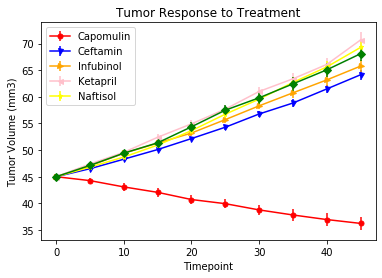

In [142]:
#plot the tumor volume means (tumor size response to treatment)
fig = plt.figure()

a=plt.errorbar(mean_comb.index, mean_comb['Capomulin'], yerr=stderr_comb['Capomulin'],marker='.', mfc='red', ms=10 ,ecolor='red',color='red')
b= plt.errorbar(mean_comb.index, mean_comb['Ceftamin'], yerr=stderr_comb['Ceftamin'],marker='v', mfc='blue', ms=5 ,ecolor='blue',color='blue')
c= plt.errorbar(mean_comb.index, mean_comb['Infubinol'], yerr=stderr_comb['Infubinol'],marker='>', mfc='orange', ms=5 ,ecolor='orange',color='orange')
d= plt.errorbar(mean_comb.index, mean_comb['Ketapril'], yerr=stderr_comb['Ketapril'],marker='<', mfc='pink', ms=5 ,ecolor='pink',color='pink')
e= plt.errorbar(mean_comb.index, mean_comb['Naftisol'], yerr=stderr_comb['Naftisol'],marker='*', mfc='yellow', ms=5 ,ecolor='yellow',color='yellow')
f= plt.errorbar(mean_comb.index, mean_comb['Placebo'], yerr=stderr_comb['Placebo'],marker='D', mfc='green', ms=5 ,ecolor='green',color='green')

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.legend([a,b,c,d,e,f],['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol'],loc='upper left')

#save the figure to png file
plt.savefig('Tumor Response to Treatment.png')

In [143]:
#testing code- IGNORE

#fig = plt.figure()
#mean=[mean_comb.columns] 
#err=[stderr_comb.columns] 
#mark=['.', 'v', '>','<', '*', 'D']
#rainbow=['red','blue', 'orange', 'pink', 'yellow','green']
#zip(mean,err,mark,rainbow) ==> [(mean1,err1,mark1,rainbow1),(mean2,err2,mark2,rainbow2), (mean3,err3,mark3,rainbow3), (mean4,err4,mark4,rainbow4), (mean5,err5,mark5,rainbow5), (mean6,err6,mark6,rainbow6)]
#for mean,err,mark,rainbow in zip(mean,err,mark,rainbow):
   # plt.errorbar(mean_comb.index, mean_comb[mean], yerr=stderr_comb['err'],marker=mark, mfc=rainbow, ms=10 ,ecolor=rainbow,color=rainbow)




![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [144]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_groupby= merged.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
meta_groupby

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
                          ...   
Zoniferol  25           1.687500
           30           1.933333
           35           2.285714
           40           2.785714
           45           3.071429
Name: Metastatic Sites, Length: 100, dtype: float64

In [145]:
# Convert to DataFrame
meta_df= pd.DataFrame(meta_groupby)
meta_df= meta_df.rename(columns={"Metastatic Sites": "Mean Metastatic Sites"})
meta_df.head()
# Preview DataFrame

Mean Metastatic Sites
Drug      Timepoint                       
Capomulin 0                       0.000000
          5                       0.160000
          10                      0.320000
          15                      0.375000
          20                      0.652174

In [146]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
meta_error= merged.groupby(['Drug', 'Timepoint']).agg(std_error=pd.NamedAgg(column='Metastatic Sites', aggfunc='sem'))
meta_error

std_error
Drug      Timepoint           
Capomulin 0           0.000000
          5           0.074833
          10          0.125433
          15          0.132048
          20          0.161621
...                        ...
Zoniferol 25          0.236621
          30          0.248168
          35          0.285714
          40          0.299791
          45          0.286400

[100 rows x 1 columns]

In [147]:
# Minor Data Munging for Means of Mean Metastatic Sites
meta_comb= meta_df.pivot_table(index='Timepoint', columns='Drug', values='Mean Metastatic Sites')
# Preview that Reformatting worked
meta_comb


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [148]:
# Minor Data Munging for std_error of Mean Metastatic Sites
meta_comb_stderr= meta_error.pivot_table(index='Timepoint', columns='Drug', values='std_error')
# Preview that Reformatting worked
meta_comb_stderr

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


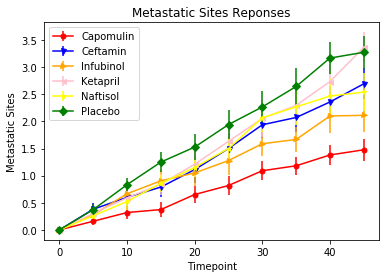

In [149]:
# Generate the Plot for metastatic sites (with Error Bars)
fig = plt.figure() 
a= plt.errorbar(meta_comb.index, meta_comb['Capomulin'], yerr=meta_comb_stderr['Capomulin'],marker='.', mfc='red', ms=10 ,ecolor='red',color='red')
b= plt.errorbar(meta_comb.index, meta_comb['Ceftamin'], yerr=meta_comb_stderr['Ceftamin'],marker='v', mfc='blue', ms=5 ,ecolor='blue',color='blue')
c= plt.errorbar(meta_comb.index, meta_comb['Infubinol'], yerr=meta_comb_stderr['Infubinol'],marker='>', mfc='orange', ms=5 ,ecolor='orange',color='orange')
d= plt.errorbar(meta_comb.index, meta_comb['Ketapril'], yerr=meta_comb_stderr['Ketapril'],marker='<', mfc='pink', ms=5 ,ecolor='pink',color='pink')
e= plt.errorbar(meta_comb.index, meta_comb['Naftisol'], yerr=meta_comb_stderr['Naftisol'],marker='*', mfc='yellow', ms=5 ,ecolor='yellow',color='yellow')
f= plt.errorbar(meta_comb.index, meta_comb['Placebo'], yerr=meta_comb_stderr['Placebo'],marker='D', mfc='green', ms=5 ,ecolor='green',color='green')

plt.xlabel('Timepoint')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Sites Reponses')
plt.legend([a,b,c,d,e,f],['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo'],loc='upper left')

#save figure to png
plt.savefig('Metastatic_Sites_Reponses.png')

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [150]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_groupby= merged.groupby(['Drug', 'Timepoint'])['Mouse ID'].nunique()
mice_groupby

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
                        ..
Zoniferol  25           16
           30           15
           35           14
           40           14
           45           14
Name: Mouse ID, Length: 100, dtype: int64

In [151]:
# Convert to DataFrame
mice_count= pd.DataFrame(mice_groupby)
mice_count= mice_count.rename(columns={"Mouse ID": "Mice Count"})
mice_count['Survival Rate']=(mice_count['Mice Count']/25)*100
#mice_count['Survival Rate'].astype(int)
mice_count.head()
# Preview DataFrame

Mice Count  Survival Rate
Drug      Timepoint                           
Capomulin 0                  25          100.0
          5                  25          100.0
          10                 25          100.0
          15                 24           96.0
          20                 23           92.0

In [152]:
# Minor Data Munging to Re-Format the Data Frames

mice_pivot= mice_count.pivot_table(index='Timepoint', columns='Drug', values='Survival Rate')
#mice_pivot= mice_pivot.style.format("{:.2%}").astype(int)
mice_pivot
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.0,96.0,88.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,64.0,96.0,88.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,64.0,92.0,80.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


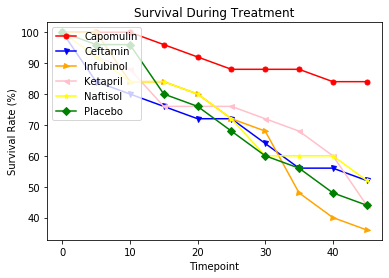

In [153]:
fig = plt.figure()

a= plt.errorbar(mice_pivot.index, mice_pivot['Capomulin'],marker='.', mfc='red', ms=10 ,ecolor='red',color='red')
b= plt.errorbar(mice_pivot.index, mice_pivot['Ceftamin'],marker='v', mfc='blue', ms=5 ,ecolor='blue',color='blue')
c= plt.errorbar(mice_pivot.index, mice_pivot['Infubinol'],marker='>', mfc='orange', ms=5 ,ecolor='orange',color='orange')
d= plt.errorbar(mice_pivot.index, mice_pivot['Ketapril'],marker='<', mfc='pink', ms=5 ,ecolor='pink',color='pink')
e= plt.errorbar(mice_pivot.index, mice_pivot['Naftisol'],marker='*', mfc='yellow', ms=5 ,ecolor='yellow',color='yellow')
f= plt.errorbar(mice_pivot.index, mice_pivot['Placebo'],marker='D', mfc='green', ms=5 ,ecolor='green',color='green')

plt.xlabel('Timepoint')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')
plt.legend([a,b,c,d,e,f],['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo'],loc='upper left')

#save figure to png
plt.savefig('Survival During Treatment.png')

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [154]:
# Calculate the percent changes for each drug
change_calc= mean_df.pivot_table(index='Timepoint', columns='Drug', values='Mean Tumor Volume')
change_calc
# Display the data to confirm


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [155]:
#calculate percent change and append calc row to dataframe
change_calc.loc['% Change'] = (change_calc.iloc[9]- change_calc.iloc[0]) / change_calc.iloc[0]*100
change_calc

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [156]:
#extract data
changes_df= change_calc.loc['% Change']
changes_df

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: % Change, dtype: float64

In [157]:
#splicing of data into success/no success
changes_df= pd.DataFrame(changes_df)
results_lst=[]

In [158]:
#creat a new df col for categorizing results
for value in changes_df['% Change']: 
    if value > 0 :
         results_lst.append('SUCCESS')
    else:
         results_lst.append('NO SUCCESS')
changes_df["Results"]=results_lst #pandas needs all the values in a column to be able to create it
changes_df

,% Change,Results
Drug,,
Capomulin,-19.475303,NO SUCCESS
Ceftamin,42.516492,SUCCESS
Infubinol,46.123472,SUCCESS
Ketapril,57.028795,SUCCESS
Naftisol,53.923347,SUCCESS
Placebo,51.297960,SUCCESS
Propriva,47.241175,SUCCESS
Ramicane,-22.320900,NO SUCCESS
Stelasyn,52.085134,SUCCESS


In [159]:
#print results only
changes_df['Results']

Drug
Capomulin    NO SUCCESS
Ceftamin        SUCCESS
Infubinol       SUCCESS
Ketapril        SUCCESS
Naftisol        SUCCESS
Placebo         SUCCESS
Propriva        SUCCESS
Ramicane     NO SUCCESS
Stelasyn        SUCCESS
Zoniferol       SUCCESS
Name: Results, dtype: object

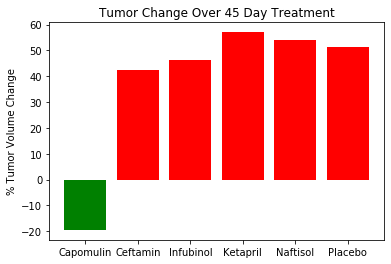

In [160]:
# Orient widths. Add labels, tick marks, etc. 
plt.bar(changes_df.index[0:6], changes_df['% Change'][0:6],color=changes_df['Results'].map({'NO SUCCESS': 'g', 'SUCCESS': 'r'}))

plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')
#plt.xticks(changes_df.index[0:6], fontsize= 'x-small',rotation=90)
#save figure to png
plt.savefig('Tumor Change Over 45 Day Treatment.png')

![Metastatic Spread During Treatment](../Images/change.png)